In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("dark")
sns.set_palette("GnBu_d")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("../data/raw/financial_data.csv")
df.head()

,Ticker,Date,totalEsg,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,furLeather,gambling,gmo,militaryContract,nuclear,pesticides,palmOil,coal,tobacco,ratingDate
0,XOM,2023-12-31,43.66,0.0,0.330,7.427300e+10,3.601000e+10,2.064100e+10,2.505550e+11,7.427300e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
1,XOM,2022-12-31,43.66,0.0,0.330,1.025910e+11,5.574000e+10,2.404000e+10,2.956080e+11,1.025910e+11,...,False,False,False,False,False,False,False,False,False,2025-02-01
2,XOM,2021-12-31,43.66,0.0,0.310,5.278800e+10,2.304000e+10,2.060700e+10,2.118060e+11,5.278800e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
3,XOM,2020-12-31,43.66,0.0,0.170,1.828400e+10,-2.244000e+10,4.600900e+10,1.704470e+11,1.828400e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
4,CVX,2023-12-31,38.36,0.0,0.276,4.504200e+10,2.136900e+10,1.498900e+10,1.365220e+11,4.504200e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01


In [4]:
df.columns.tolist()

['Ticker',
 'Date',
 'totalEsg',
 'Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Minority Interests',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Earnings From Equity Interest',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Operating Income',
 'Operating Expense',
 'Other Operating Expenses',
 'Other Taxes',
 'Selling General 

In [5]:
# checking which columns aren't null
df.columns[~df.isna().any()]

Index(['Ticker', 'Date', 'totalEsg', 'maxAge', 'ratingYear', 'ratingMonth',
       'highestControversy', 'peerCount', 'esgPerformance', 'peerGroup',
       'peerEsgScorePerformance', 'peerGovernancePerformance',
       'peerSocialPerformance', 'peerEnvironmentPerformance',
       'peerHighestControversyPerformance', 'adult', 'alcoholic',
       'animalTesting', 'controversialWeapons', 'smallArms', 'furLeather',
       'gambling', 'gmo', 'militaryContract', 'nuclear', 'pesticides',
       'palmOil', 'coal', 'tobacco', 'ratingDate'],
      dtype='object')

basically all the financial data has missing values somewhere that needs to be further analyzed

In [6]:
null_columns = df.columns[df.isna().any()]

In [7]:
df[null_columns].isna().sum()

Tax Effect Of Unusual Items                                     98
Tax Rate For Calcs                                              98
Normalized EBITDA                                              261
Net Income From Continuing Operation Net Minority Interest      98
Reconciled Depreciation                                        110
                                                              ... 
percentile                                                    1378
environmentPercentile                                         1530
socialPercentile                                              1530
governancePercentile                                          1530
catholic                                                      1378
Length: 348, dtype: int64

In [8]:
# calculate the proportion of missing values per feature
missing_proportions = df[null_columns].isna().mean()
missing_proportions = missing_proportions.sort_values(ascending=False)
missing_proportions

governancePercentile                    1.000000
socialPercentile                        1.000000
environmentPercentile                   1.000000
Dividends Paid Direct                   1.000000
Net Policyholder Benefits And Claims    0.998039
                                          ...   
Changes In Cash                         0.062745
governanceScore                         0.037255
socialScore                             0.037255
environmentScore                        0.037255
relatedControversy                      0.005229
Length: 348, dtype: float64

In [9]:
len(missing_proportions[missing_proportions > 0.7].index)

137

In [10]:
# filter out features with more than 50% missing values
df_dropped = df.drop(missing_proportions[missing_proportions > 0.5].index, axis=1)

In [ ]:
# backward fill the remaining missing values (temporary bandaid fix for all features, could be perma for some)
df_dropped = df_dropped.fillna(method='bfill', axis=0)

C:\Users\Mishaal\AppData\Local\Temp\ipykernel_22364\388043668.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dropped = df_dropped.fillna(method='bfill', axis=0)


In [44]:
df_dropped[null_columns.intersection(df_dropped.columns)].isna().sum()[df_dropped[null_columns.intersection(df_dropped.columns)].isna().sum() > 0]

Other Operating Expenses              4
Selling General And Administration    4
General And Administrative Expense    4
Capital Lease Obligations             4
Long Term Capital Lease Obligation    4
Accounts Payable                      4
Raw Materials                         4
Other Receivables                     2
Capital Expenditure                   4
Net PPE Purchase And Sale             4
Purchase Of PPE                       4
Deferred Tax                          4
Current Capital Lease Obligation      4
Machinery Furniture Equipment         4
Prepaid Assets                        4
Other Short Term Investments          6
Sale Of PPE                           4
dtype: int64

In [19]:
df_dropped.head()

,Ticker,Date,totalEsg,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,furLeather,gambling,gmo,militaryContract,nuclear,pesticides,palmOil,coal,tobacco,ratingDate
0,XOM,2023-12-31,43.66,0.0,0.330,7.427300e+10,3.601000e+10,2.064100e+10,2.505550e+11,7.427300e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
1,XOM,2022-12-31,43.66,0.0,0.330,1.025910e+11,5.574000e+10,2.404000e+10,2.956080e+11,1.025910e+11,...,False,False,False,False,False,False,False,False,False,2025-02-01
2,XOM,2021-12-31,43.66,0.0,0.310,5.278800e+10,2.304000e+10,2.060700e+10,2.118060e+11,5.278800e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
3,XOM,2020-12-31,43.66,0.0,0.170,1.828400e+10,-2.244000e+10,4.600900e+10,1.704470e+11,1.828400e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01
4,CVX,2023-12-31,38.36,0.0,0.276,4.504200e+10,2.136900e+10,1.498900e+10,1.365220e+11,4.504200e+10,...,False,False,False,False,False,False,False,False,False,2025-02-01


# Visualizations

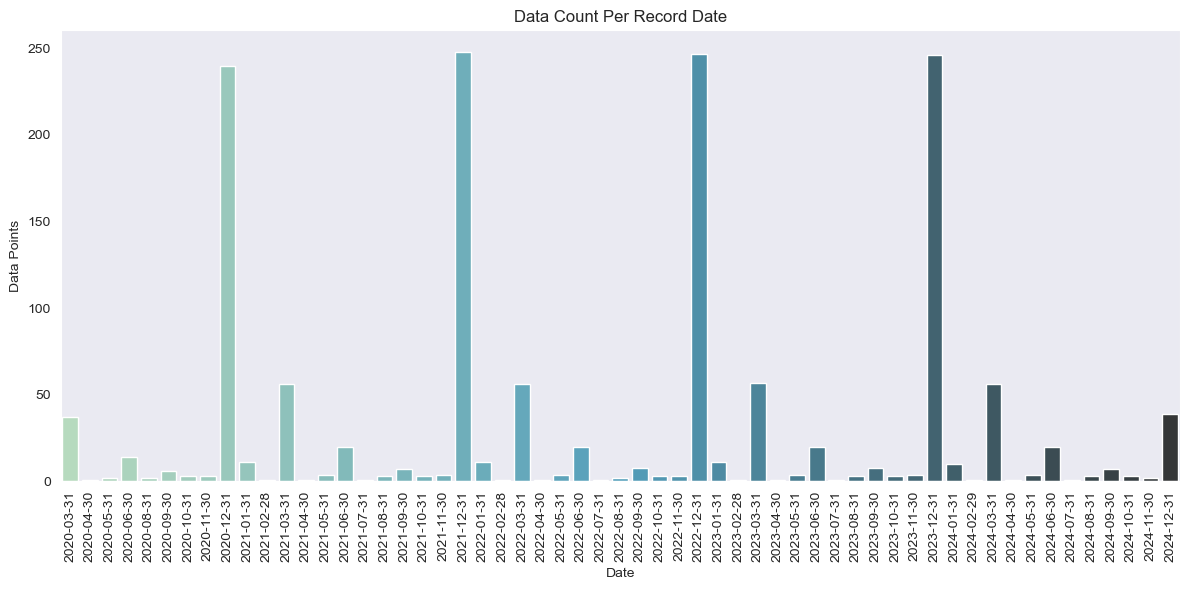

In [8]:
date_counts = df.groupby('Date').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
colors = sns.color_palette("GnBu_d", len(date_counts))
sns.barplot(data=date_counts, x='Date', y='count', palette=colors, hue='Date', legend=False)

plt.xticks(rotation=90) 
plt.xlabel("Date")
plt.ylabel("Data Points")
plt.title("Data Count Per Record Date")
plt.tight_layout()
plt.show()

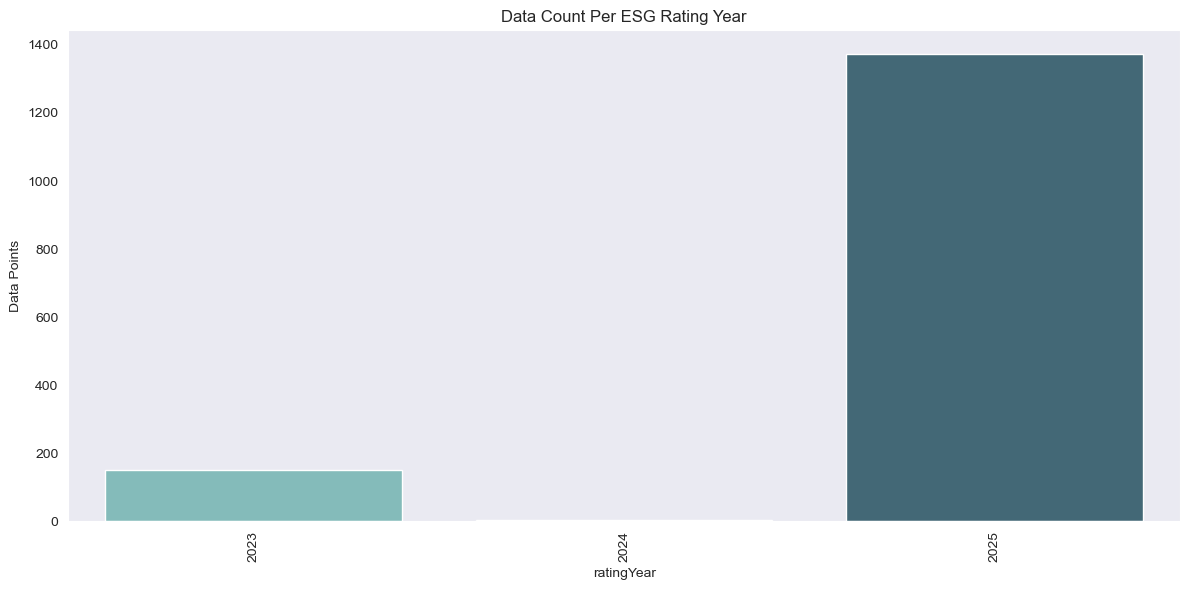

In [9]:
date_counts = df.groupby('ratingYear').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
colors = sns.color_palette("GnBu_d", len(date_counts))
sns.barplot(data=date_counts, x='ratingYear', y='count', palette=colors, hue='ratingYear', legend=False)

plt.xticks(rotation=90) 
plt.xlabel("ratingYear")
plt.ylabel("Data Points")
plt.title("Data Count Per ESG Rating Year")
plt.tight_layout()
plt.show()

In [11]:
df.columns.tolist()

['Ticker',
 'Date',
 'totalEsg',
 'Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Minority Interests',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Earnings From Equity Interest',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Operating Income',
 'Operating Expense',
 'Other Operating Expenses',
 'Other Taxes',
 'Selling General 

In [13]:
# important financial feature extracted based on domain knowledge
financial_features = [
    'EBITDA',
    'EBIT',
    'Total Expenses',
    'Diluted EPS',
    'Basic EPS',
    'Net Income',
    'Operating Income',
    'Operating Expense',
    'Gross Profit',
    'Cost Of Revenue',
    'Total Revenue',
    'Total Debt',
    'Net Debt',
    'Working Capital',
    'Total Assets',
    'Stockholders Equity',
    'Total Expenses',
    'Operating Cash Flow',
    'Free Cash Flow',
    'Capital Expenditure',
    'Research And Development',
    'Common Stock Dividend Paid',
    'Ordinary Shares Number',
    'Current Assets',
    'Current Liabilities',
]

In [14]:
base_features = [
    'Ticker',
    'Date',
    'totalEsg',
    'ratingDate',
    'environtmentScore',
    'socialScore',
    'governanceScore',
]

# EDA

## Feature Characteristics

### Checking data types & distributions

In [36]:
df.dtypes.value_counts()

float64    350
bool        14
object      12
int64        4
Name: count, dtype: int64

In [37]:
categorical_features = df.select_dtypes(include=['object']).columns

In [38]:
categorical_features

Index(['Ticker', 'Date', 'esgPerformance', 'peerGroup', 'relatedControversy',
       'peerEsgScorePerformance', 'peerGovernancePerformance',
       'peerSocialPerformance', 'peerEnvironmentPerformance',
       'peerHighestControversyPerformance', 'catholic', 'ratingDate'],
      dtype='object')

In [35]:
df[financial_features].dtypes

EBITDA                        float64
EBIT                          float64
Total Expenses                float64
Diluted EPS                   float64
Basic EPS                     float64
Net Income                    float64
Operating Income              float64
Operating Expense             float64
Gross Profit                  float64
Cost Of Revenue               float64
Total Revenue                 float64
Total Debt                    float64
Net Debt                      float64
Working Capital               float64
Total Assets                  float64
Stockholders Equity           float64
Total Expenses                float64
Operating Cash Flow           float64
Free Cash Flow                float64
Capital Expenditure           float64
Research And Development      float64
Common Stock Dividend Paid    float64
Ordinary Shares Number        float64
Current Assets                float64
Current Liabilities           float64
dtype: object

Feature: EBITDA


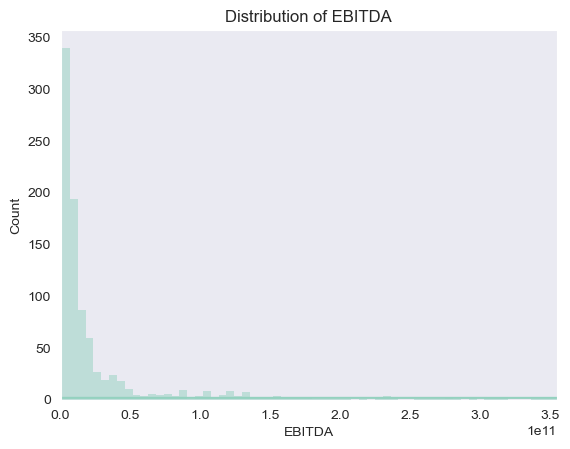

In [24]:
feature = financial_features[0]
print(f"Feature: {feature}")
sns.histplot(df[feature], kde=True)
plt.title(f"Distribution of {feature}")
plt.xlim(0, df[feature].quantile(0.90)) # used to remove outliers
plt.show()


Feature: EBITDA


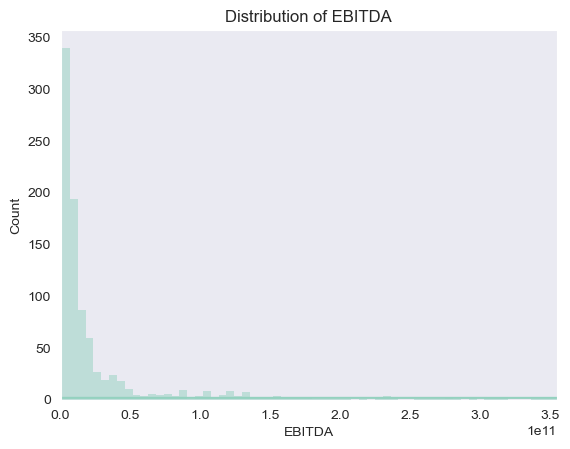


Feature: EBIT


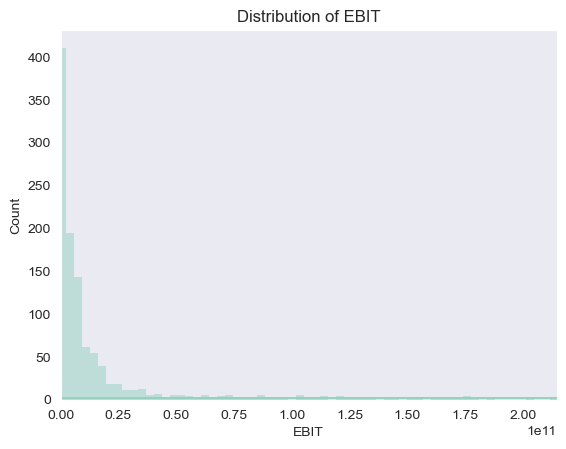


Feature: Total Expenses


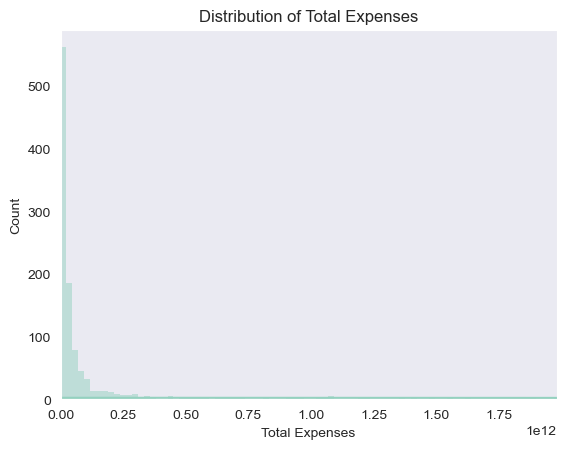


Feature: Diluted EPS


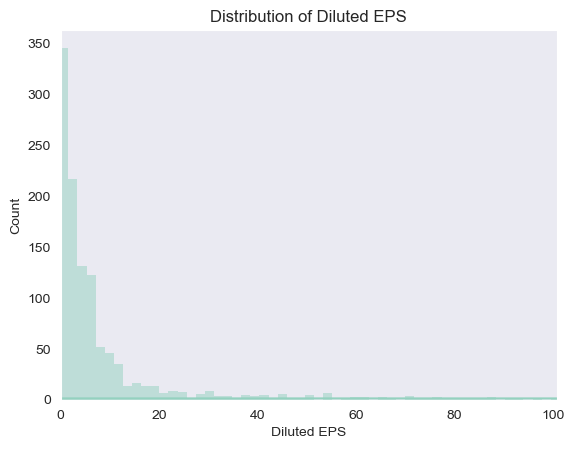


Feature: Basic EPS


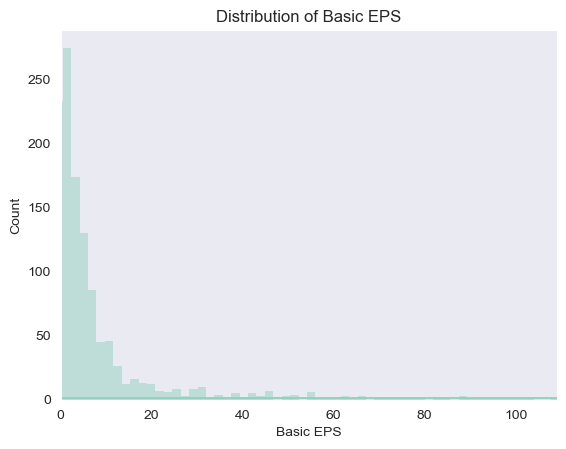


Feature: Net Income


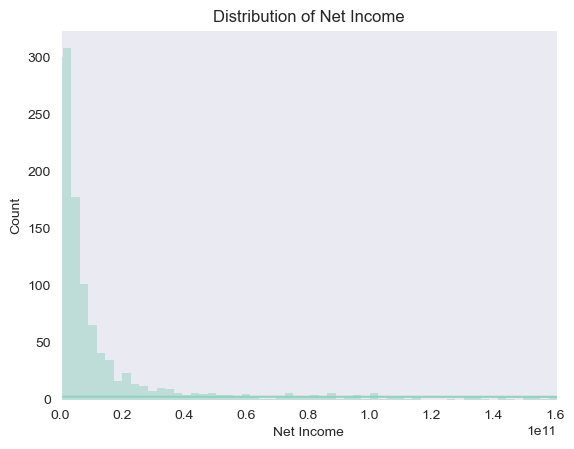


Feature: Operating Income


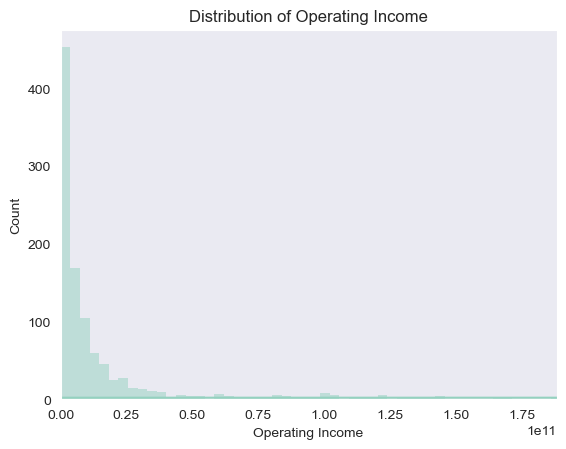


Feature: Operating Expense


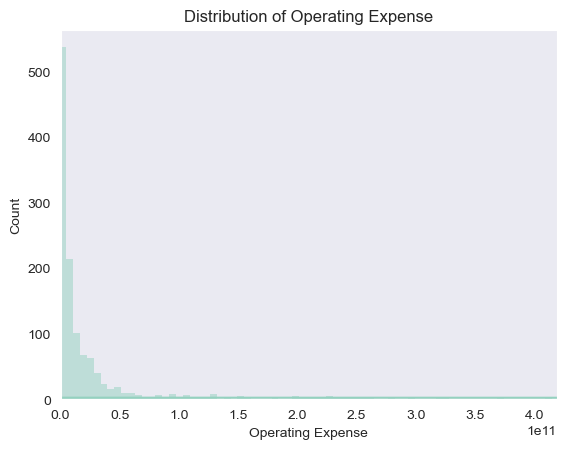


Feature: Gross Profit


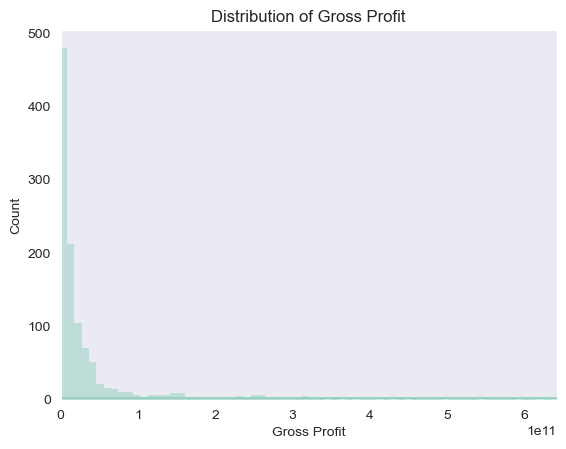


Feature: Cost Of Revenue


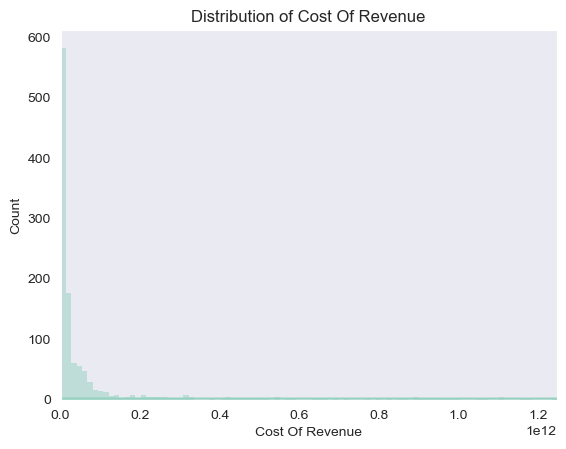


Feature: Total Revenue


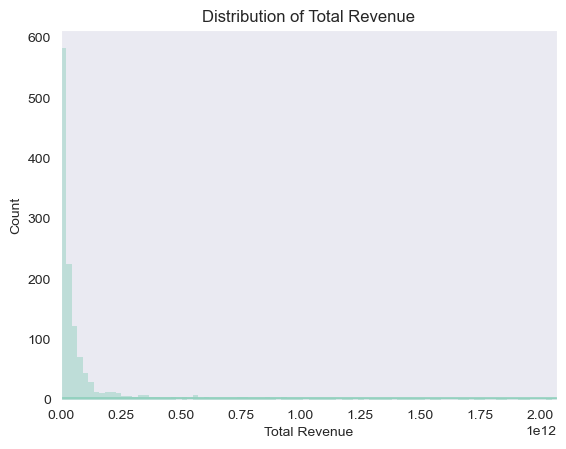


Feature: Total Debt


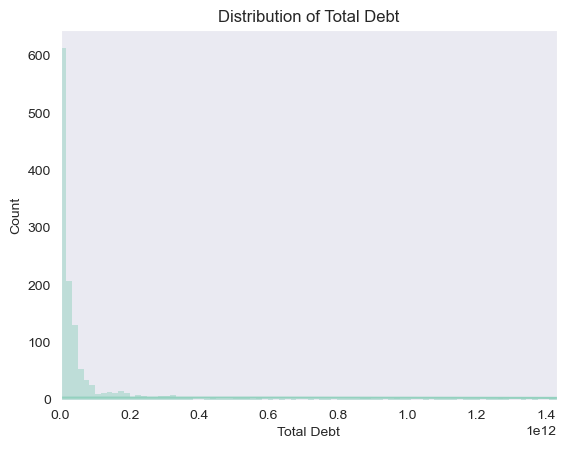


Feature: Net Debt


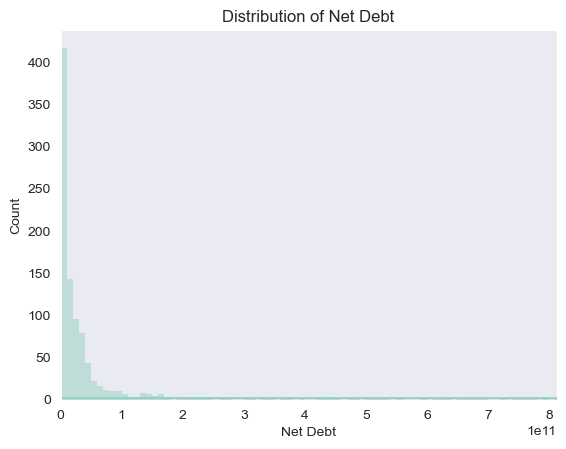


Feature: Working Capital


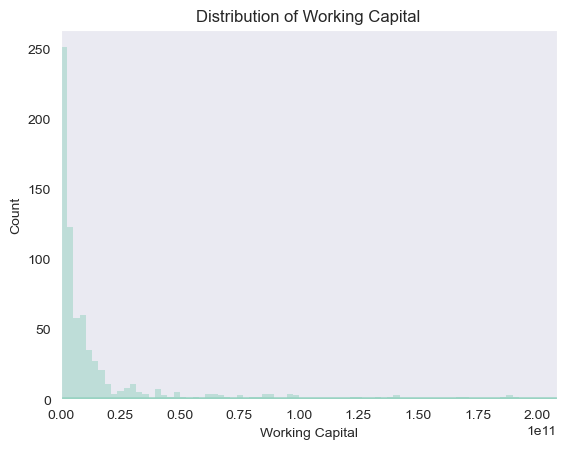


Feature: Total Assets


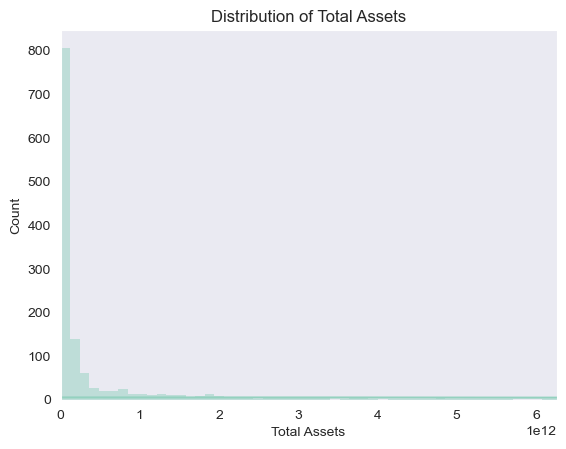


Feature: Stockholders Equity


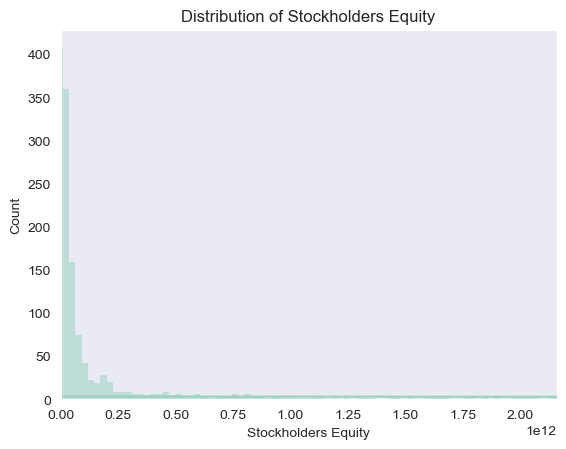


Feature: Total Expenses


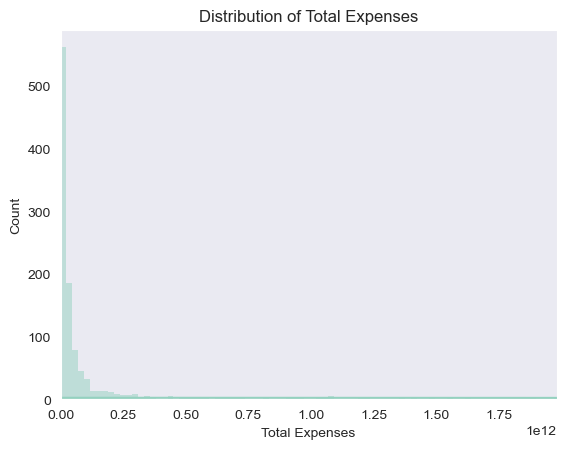


Feature: Operating Cash Flow


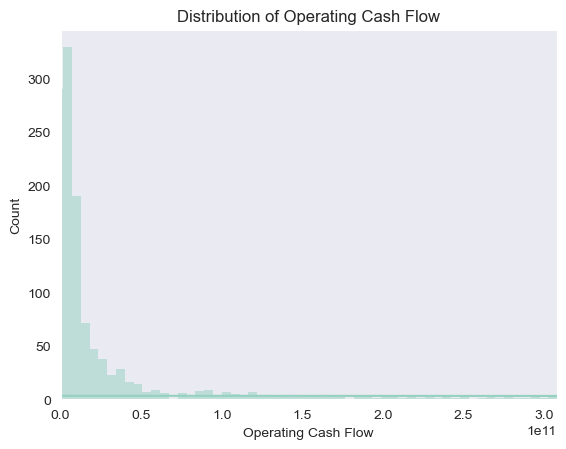


Feature: Free Cash Flow


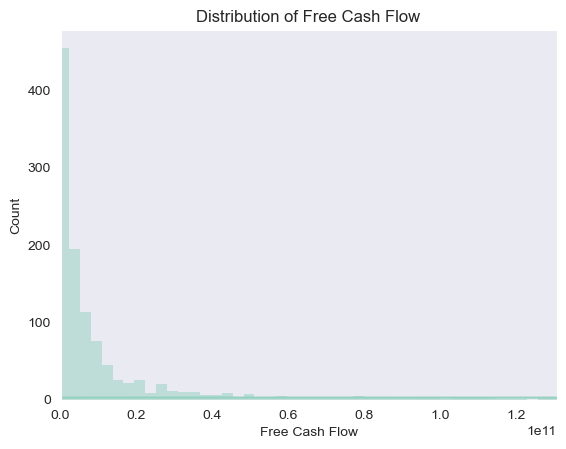


Feature: Capital Expenditure


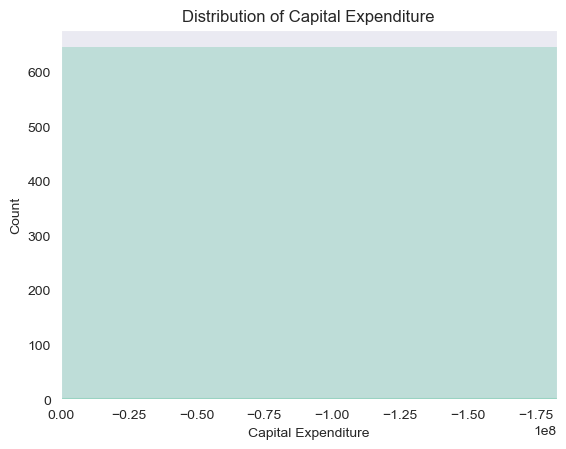


Feature: Research And Development


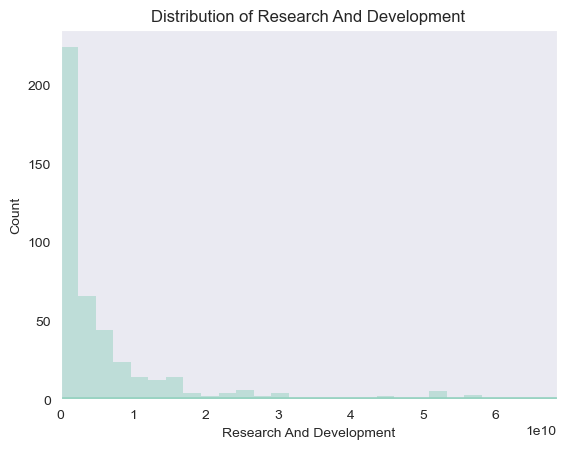


Feature: Common Stock Dividend Paid


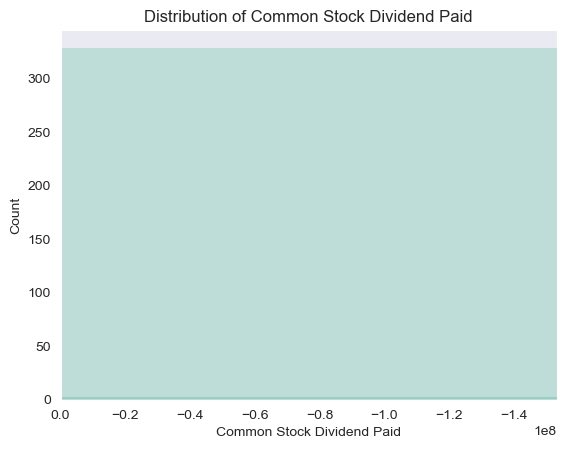


Feature: Ordinary Shares Number


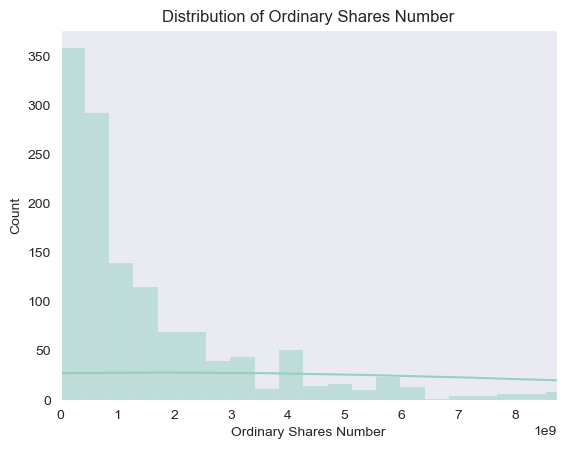


Feature: Current Assets


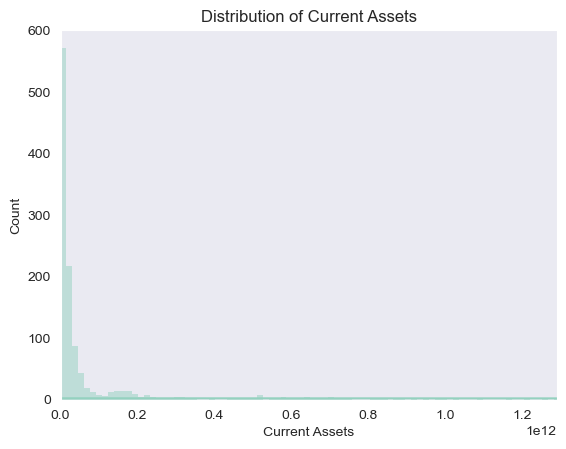


Feature: Current Liabilities


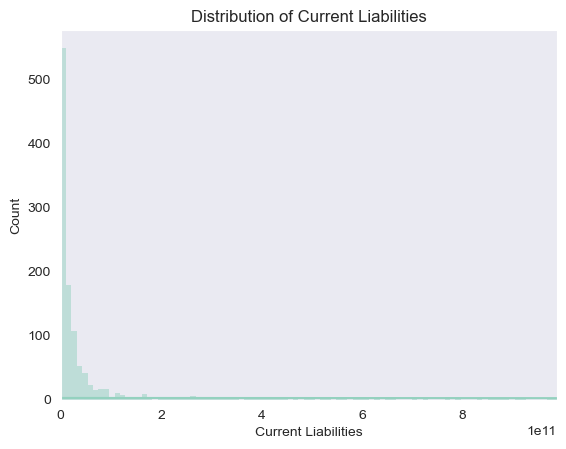

In [26]:
for feature in financial_features:
    print(f"\nFeature: {feature}")
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlim(0, df[feature].quantile(0.90))
    plt.show()

l:\Programs\anaconda\envs\esg_pred\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


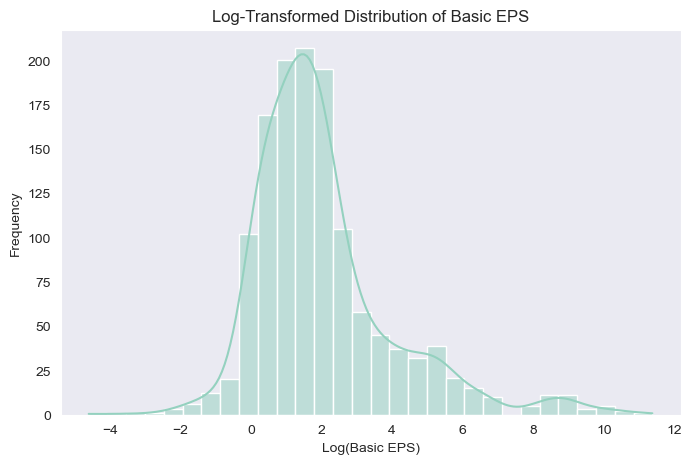

In [27]:
# trying out log transformations to handle skewedness
df["Basic_EPS_Log"] = np.log1p(df["Basic EPS"])  # log1p avoids log(0) errors

plt.figure(figsize=(8, 5))
sns.histplot(df["Basic_EPS_Log"], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Basic EPS")
plt.xlabel("Log(Basic EPS)")
plt.ylabel("Frequency")
plt.show()

In [30]:
# trying out robust scaling to handle skewedness
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["Basic_EPS_Scaled"] = scaler.fit_transform(df[["Basic EPS"]])


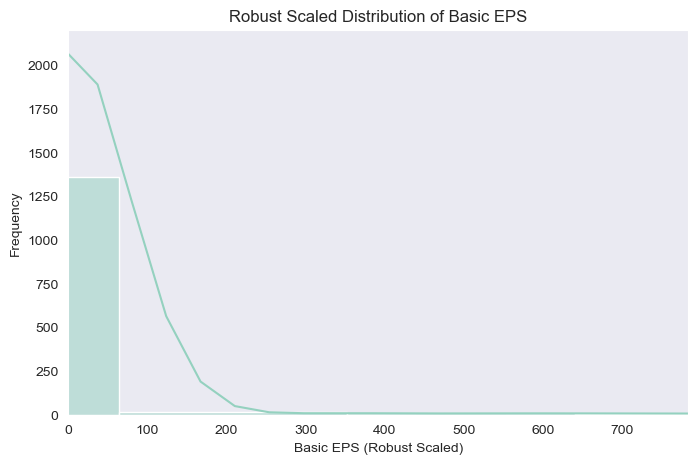

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Basic_EPS_Scaled"], kde=True, bins=30)
plt.title("Robust Scaled Distribution of Basic EPS")
plt.xlim(0, df["Basic_EPS_Scaled"].quantile(0.99))
plt.xlabel("Basic EPS (Robust Scaled)")
plt.ylabel("Frequency")
plt.show()

### Missing Values

## Assessing Feature Relevance

### Correlation Analysis

## Identifying Redundant Features

### Multicollinearity Check

## Feature Selection Techniques

## Feature Relationships

### Pair Plots & Heatmaps

## Feature Importance

***